## Abstract

This study explores the relationship between home team attendance and home team performance, specifically focusing on the influence of goals scored at home matches. Using data from football matches, we analyzed attendance figures and game outcomes to investigate whether higher spectator attendance correlates with increased home team scores.

Data preprocessing involved merging and cleaning datasets to extract relevant information such as game details, attendance figures, and team performance metrics. Attendance was adjusted to account for away fans, and deviations from the median attendance were calculated to categorize attendance levels. Statistical measures, including the median, mean deviations, and Pearson correlation coefficient, were used to assess relationships between mean home goals and attendance deviations across different categories.

Visualization techniques such as scatter plots, box plots, and histograms were employed to illustrate these relationships visually. Findings suggest a modest correlation between higher home team scores (up to 6 goals) and increased average attendance, implying that higher attendance could positively impact team performance. Goals scored beyond 6 were considered rare events and excluded from detailed analysis due to their infrequency.

The presence of outliers in attendance deviations underscores the inherent unpredictability of match outcomes, influenced by external factors such as opponent strength, seasonality, promotions, and weather conditions. These factors significantly affect both attendance and team performance.

This study provides insights into factors influencing team performance in football, highlighting the dynamic interaction between team achievements and fan attendance.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
plt.style.use('ggplot')

# IMPORT CSV DATASET

In [3]:
df_games = pd.read_csv('AssignmentData/games.csv')
df_club_games = pd.read_csv('AssignmentData/club_games.csv')

In [4]:
df_games.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,referee,url,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,Vladislav Bezborodov,https://www.transfermarkt.co.uk/terek-grozny_s...,NaN,NaN,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,Sergey Ivanov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,Sergey Karasev,https://www.transfermarkt.co.uk/cska-moscow_di...,NaN,NaN,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,...,RZD Arena,11408.0,Sergey Karasev,https://www.transfermarkt.co.uk/lokomotiv-mosc...,NaN,NaN,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,...,Metallurg,7534.0,Timur Arslanbekov,https://www.transfermarkt.co.uk/krylya-sovetov...,NaN,NaN,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


In [5]:
df_games.columns

Index(['game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee', 'url',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'],
      dtype='object')

### Data Cleaning
Select relevant columns

In [6]:
df_games_cleaned = df_games[[
    'game_id', 'competition_id', 'season', 'round', 'date', 'home_club_id',
       'away_club_id', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'stadium', 'attendance', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type'
]].copy()

In [7]:
df_games_cleaned.head()

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league
1,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league
2,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league
3,2222664,RU1,2012,8. Matchday,2012-09-15,932,2698,1,0,5.0,8.0,RZD Arena,11408.0,"Футбольный клуб ""Локомотив"" Москва",FC Rubin Kazan,1:0,domestic_league
4,2222683,RU1,2012,12. Matchday,2012-10-22,2696,12438,0,1,11.0,16.0,Metallurg,7534.0,PFK Krylya Sovetov Samara,Volga Nizhniy Novgorod (- 2016),0:1,domestic_league


### Merge df_games_cleaned with relevant columns from df_club_games based on game_id

In [8]:
df_games_cleaned = pd.merge(df_games_cleaned, df_club_games[['game_id', 'hosting']], on='game_id', how='inner')
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,hosting
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,Home
1,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,Away
2,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,Home
3,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,Away
4,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league,Home
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130427,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,NaN,Philips Stadion,34200.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup,Away
130428,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other,Home
130429,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other,Away
130430,4013659,FAC,2022,Fourth Round,2023-01-29,512,3684,3,1,NaN,NaN,bet365 Stadium,14392.0,Stoke City,NaN,3:1,domestic_cup,Home


### Estimate the quantity of the home team attendance
The percentage of available seats for away fans are defined by insitutions like UEFA or Premier League. 
That is around the 10% of the total stadium capability.

In [9]:
# Function to calculate home team attendance adjusted for away fans percentage
away_attendance_percentage = 0.10 # Assuming 10% of stadium capacity for away fans
df_games_cleaned['home_team_attendance'] = df_games_cleaned.apply(lambda row: row['attendance'] * ( 1 - away_attendance_percentage ) if row['hosting'] == 'Home' else row['attendance'] * away_attendance_percentage, axis=1 )
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,hosting,home_team_attendance
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,Home,19530.0
1,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,5.0,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,Away,2170.0
2,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,Home,10260.0
3,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,10.0,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,Away,1140.0
4,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,13.0,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league,Home,10800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130427,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,NaN,Philips Stadion,34200.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup,Away,3420.0
130428,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other,Home,8469.0
130429,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,NaN,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other,Away,941.0
130430,4013659,FAC,2022,Fourth Round,2023-01-29,512,3684,3,1,NaN,NaN,bet365 Stadium,14392.0,Stoke City,NaN,3:1,domestic_cup,Home,12952.8


### Calculate the median of home team attendance

In [10]:
median_home_team_attendance = df_games_cleaned['home_team_attendance'].median()
print('median_home_team_attendance = \"' + str(median_home_team_attendance) + '\"')

median_home_team_attendance = "3033.05"


### Calculate deviation from median for each attendance value

In [11]:
df_games_cleaned.loc[:, 'deviation_from_median'] = df_games_cleaned['home_team_attendance'] - median_home_team_attendance

### Calculate the mean deviation from median to set significant thresholds

In [12]:
df_games_cleaned['deviation_from_median'].mean()

5997.118668318254

### Define thresholds and categorize values

In [13]:
# Define bins and labels based on deviation from median
bins = [float('-inf'), -10000, -5000, 0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, float('inf')]
labels = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13']

# Categorize attendance deviations into bins using pandas cut function
df_games_cleaned['home_team_attendance_category'] = pd.cut(df_games_cleaned['deviation_from_median'], bins=bins, labels=labels)
df_games_cleaned

,game_id,competition_id,season,round,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,...,stadium,attendance,home_club_name,away_club_name,aggregate,competition_type,hosting,home_team_attendance,deviation_from_median,home_team_attendance_category
0,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,Home,19530.0,16496.95,T6
1,2222597,RU1,2012,6. Matchday,2012-08-25,3725,232,2,1,2.0,...,Akhmat-Arena,21700.0,RFK Akhmat Grozny,FK Spartak Moskva,2:1,domestic_league,Away,2170.0,-863.05,T2
2,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,Home,10260.0,7226.95,T4
3,2222627,RU1,2012,5. Matchday,2012-08-20,2696,4128,0,2,11.0,...,Metallurg,11400.0,PFK Krylya Sovetov Samara,Amkar Perm,0:2,domestic_league,Away,1140.0,-1893.05,T2
4,2222658,RU1,2012,10. Matchday,2012-09-30,2410,121,0,2,2.0,...,Arena Khimki,12000.0,PFK CSKA Moskva,FK Dinamo Moskva,0:2,domestic_league,Home,10800.0,7766.95,T4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130427,3092951,CLQ,2018,Qualifying Round 2nd leg,2018-08-29,383,713,3,0,NaN,...,Philips Stadion,34200.0,Eindhovense Voetbalvereniging Philips Sport Ve...,NaN,3:0,international_cup,Away,3420.0,386.95,T3
130428,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other,Home,8469.0,5435.95,T4
130429,4164101,CGB,2023,Second Round,2023-08-29,512,1194,6,1,NaN,...,bet365 Stadium,9410.0,Stoke City,NaN,6:1,other,Away,941.0,-2092.05,T2
130430,4013659,FAC,2022,Fourth Round,2023-01-29,512,3684,3,1,NaN,...,bet365 Stadium,14392.0,Stoke City,NaN,3:1,domestic_cup,Home,12952.8,9919.75,T4


### Extract home goals and away goals from 'aggregate' column

In [14]:
df_games_cleaned[['home_goals', 'away_goals']] = df_games_cleaned['aggregate'].str.split(':', expand=True).astype(int)

### Calculate the Mean for each group

In [15]:
# Group by attendance category and calculate mean home goals for each category
category_means = df_games_cleaned.groupby('home_team_attendance_category', observed=True)['home_goals'].mean().reset_index()
category_means.columns = ['home_team_attendance_category', 'mean_home_goals']
print(category_means)

   home_team_attendance_category  mean_home_goals
0                             T2         1.508078
1                             T3         1.686862
2                             T4         1.549789
3                             T5         1.527521
4                             T6         1.521667
5                             T7         1.619062
6                             T8         1.731138
7                             T9         1.828953
8                            T10         2.034146
9                            T11         1.927033
10                           T12         2.070056
11                           T13         2.194241


### Calculate the Correlation Coefficient
Calculate the Pearson correlation coefficient between mean home goals and deviation from median attendance

In [16]:
correlation_coef = np.corrcoef(category_means['mean_home_goals'], df_games_cleaned.groupby('home_team_attendance_category', observed=True)['deviation_from_median'].mean())[0, 1]
print('Correlation Coefficient:', correlation_coef)

Correlation Coefficient: 0.9107502325401177


### Generate and Visualize Scatter Plot
Scatter plot of mean home goals vs attendance category

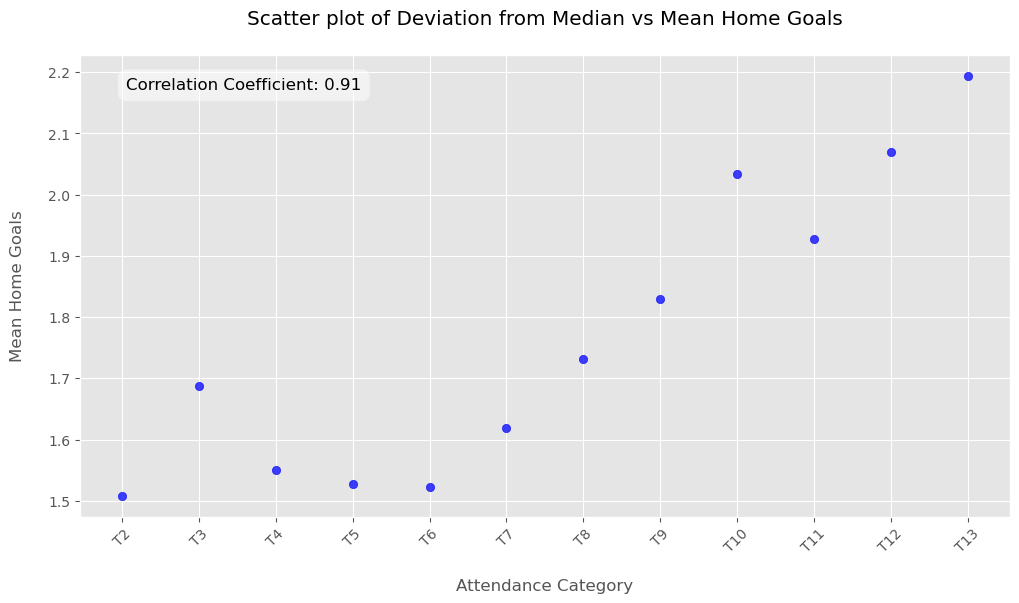

In [17]:
plt.figure(figsize=(12, 6))
plt.scatter(category_means['home_team_attendance_category'], category_means['mean_home_goals'], alpha=0.75, color='b')
plt.title('Scatter plot of Deviation from Median vs Mean Home Goals\n')
plt.xlabel('\nAttendance Category')
plt.ylabel('Mean Home Goals\n')
plt.xticks(rotation=45)
plt.grid(True)


# Annotate the plot with correlation coefficient
correlation_text = f'Correlation Coefficient: {correlation_coef:.2f}'
plt.annotate(correlation_text, xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))

plt.show()

### Validity of Analysis

* <b>Causation vs. Correlation:</b> While the analysis identifies a correlation between attendance and home team scores,<br>
  remember that correlation does not imply causation. Other factors (e.g., opponent strength, seasonality, promotions, weather conditions)<br>
  could influence both attendance and team performance.
  
* <b>Data Integrity:</b> Any errors or biases in data set could impact the whole result.

### Generate and Visualize a Box Plot
Box plot of deviation from median vs home goals


Up to 6 home goals, there is a slight average increase in the number of spectators for the home team.<br>
Goals from 7 onwards were excluded from the analysis as they are rare events.<br>
We also observed a high presence of outlier values, likely due to the inherent unpredictability in match outcomes.<br>

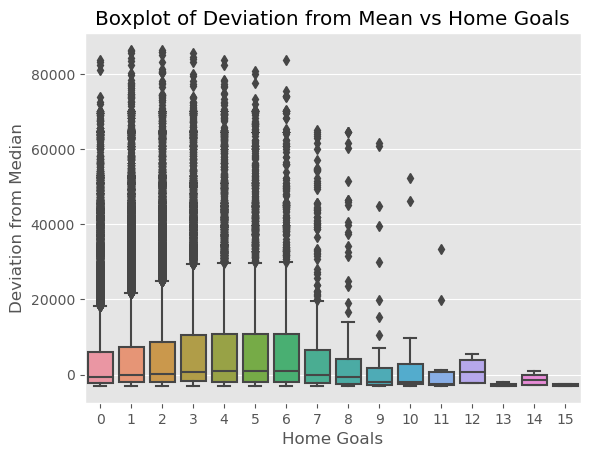

In [18]:
# Plot a box plot to visualize the relationship between deviation from median attendance (y-axis) and home goals (x-axis)
sns.boxplot(x='home_goals', y='deviation_from_median', data=df_games_cleaned)
plt.title('Boxplot of Deviation from Mean vs Home Goals')
plt.xlabel('Home Goals')
plt.ylabel('Deviation from Median')
plt.show()

### Generate and Visualize a histogram
Plot histogram of attendance categories

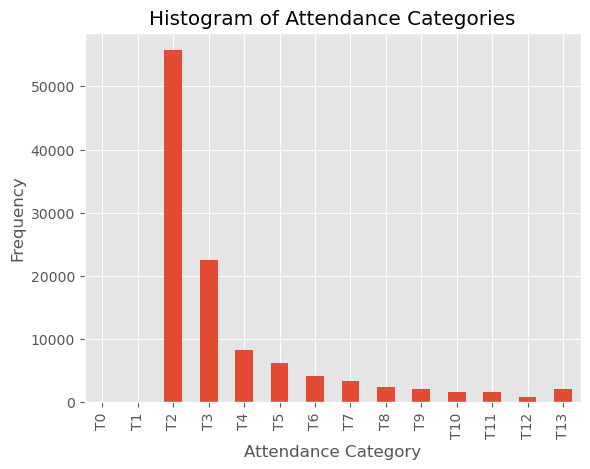

In [19]:
df_games_cleaned['home_team_attendance_category'].value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of Attendance Categories')
plt.xlabel('Attendance Category')
plt.ylabel('Frequency')
plt.show()